# 669. Trim a Binary Search Tree
* https://leetcode.com/problems/trim-a-binary-search-tree/description/
* https://programmercarl.com/0669.%E4%BF%AE%E5%89%AA%E4%BA%8C%E5%8F%89%E6%90%9C%E7%B4%A2%E6%A0%91.html

In [ ]:
# 哇我自己写的，我好帅！！！
class Solution:
    def trimBST(self, root: Optional[TreeNode], low: int, high: int) -> Optional[TreeNode]:
        if not root:
            return None
        if root.val < low:
            return self.trimBST(root.right, low, high)
        elif root.val > high:
            return self.trimBST(root.left, low, high)
        else:
            root.left = self.trimBST(root.left, low, high)
            root.right = self.trimBST(root.right, low, high)
        return root

In [ ]:
# 迭代法

class Solution:
    def trimBST(self, root: TreeNode, L: int, R: int) -> TreeNode:
        if not root:
            return None
        
        # 处理头结点，让root移动到[L, R] 范围内，注意是左闭右闭
        while root and (root.val < L or root.val > R):
            if root.val < L:
                root = root.right  # 小于L往右走
            else:
                root = root.left  # 大于R往左走
        
        cur = root
        
        # 此时root已经在[L, R] 范围内，处理左孩子元素小于L的情况
        while cur:
            while cur.left and cur.left.val < L:
                cur.left = cur.left.right
            cur = cur.left
        
        cur = root
        
        # 此时root已经在[L, R] 范围内，处理右孩子大于R的情况
        while cur:
            while cur.right and cur.right.val > R:
                cur.right = cur.right.left
            cur = cur.right
        
        return root

# 108. Convert Sorted Array to Binary Search Tree

将有序数组转换为二叉搜索树

* https://leetcode.com/problems/convert-sorted-array-to-binary-search-tree/description/
* https://programmercarl.com/0108.%E5%B0%86%E6%9C%89%E5%BA%8F%E6%95%B0%E7%BB%84%E8%BD%AC%E6%8D%A2%E4%B8%BA%E4%BA%8C%E5%8F%89%E6%90%9C%E7%B4%A2%E6%A0%91.html

A height-balanced binary tree is a binary tree in which the depth of the two subtrees of every node never differs by more than one.

其实数组构造二叉树，构成平衡树是自然而然的事情，因为大家默认都是从数组中间位置取值作为节点元素，一般不会随机取。所以想构成不平衡的二叉树是自找麻烦。

本质就是寻找分割点，分割点作为当前节点，然后递归左区间和右区间。


In [ ]:
# 好神奇的递归~！
class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> Optional[TreeNode]:
        if len(nums)==0:
            return None
        if len(nums)==1:
            return TreeNode(val = nums[0])
        mid = int(len(nums)//2)
        root = TreeNode(val = nums[mid])
        root.left = self.sortedArrayToBST(nums[:mid])
        root.right = self.sortedArrayToBST(nums[mid+1:])
        return root

In [ ]:
class Solution:
    def traversal(self, nums: List[int], left: int, right: int) -> TreeNode:
        if left > right:
            return None
        
        mid = left + (right - left) // 2 # 这种写法可以避免out of range
        root = TreeNode(nums[mid])
        root.left = self.traversal(nums, left, mid - 1)
        root.right = self.traversal(nums, mid + 1, right)
        return root
    
    def sortedArrayToBST(self, nums: List[int]) -> TreeNode:
        root = self.traversal(nums, 0, len(nums) - 1)
        return root

In [ ]:
# 迭代法

from collections import deque

class Solution:
    def sortedArrayToBST(self, nums: List[int]) -> TreeNode:
        if len(nums) == 0:
            return None
        
        root = TreeNode(0)  # 初始根节点
        nodeQue = deque()   # 放遍历的节点
        leftQue = deque()   # 保存左区间下标
        rightQue = deque()  # 保存右区间下标
        
        nodeQue.append(root)               # 根节点入队列
        leftQue.append(0)                  # 0为左区间下标初始位置
        rightQue.append(len(nums) - 1)     # len(nums) - 1为右区间下标初始位置

        while nodeQue:
            curNode = nodeQue.popleft()
            left = leftQue.popleft()
            right = rightQue.popleft()
            mid = left + (right - left) // 2

            curNode.val = nums[mid]  # 将mid对应的元素给中间节点

            if left <= mid - 1:  # 处理左区间
                curNode.left = TreeNode(0)
                nodeQue.append(curNode.left)
                leftQue.append(left)
                rightQue.append(mid - 1)

            if right >= mid + 1:  # 处理右区间
                curNode.right = TreeNode(0)
                nodeQue.append(curNode.right)
                leftQue.append(mid + 1)
                rightQue.append(right)

        return root


# 538. Convert BST to Greater Tree
* https://leetcode.com/problems/convert-bst-to-greater-tree/description/
* https://programmercarl.com/0538.%E6%8A%8A%E4%BA%8C%E5%8F%89%E6%90%9C%E7%B4%A2%E6%A0%91%E8%BD%AC%E6%8D%A2%E4%B8%BA%E7%B4%AF%E5%8A%A0%E6%A0%91.html#%E7%AE%97%E6%B3%95%E5%85%AC%E5%BC%80%E8%AF%BE

其实这就是一棵树，大家可能看起来有点别扭，换一个角度来看，这就是一个有序数组[2, 5, 13]，求从后到前的累加数组，也就是[20, 18, 13]，是不是感觉这就简单了。

为什么变成数组就是感觉简单了呢？

因为数组大家都知道怎么遍历啊，从后向前，挨个累加就完事了，这换成了二叉搜索树，看起来就别扭了一些是不是。

那么知道如何遍历这个二叉树，也就迎刃而解了，从树中可以看出累加的顺序是**右中左**，所以我们需要反中序遍历这个二叉树，然后顺序累加就可以了。

本题依然需要一个pre指针记录当前遍历节点cur的前一个节点，这样才方便做累加。

注意要右中左来遍历二叉树， 中节点的处理逻辑就是让cur的数值加上前一个节点的数值。

In [ ]:
class Solution:
    def convertBST(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        self.pre = 0
        self.traversal(root)
        return root
    
    def traversal(self, cur):
        if not cur:
            return
        self.traversal(cur.right)
        cur.val += self.pre
        self.pre = cur.val
        self.traversal(cur.left)

In [ ]:
class Solution:
    def __init__(self):
        self.count = 0

    def convertBST(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        if root == None:
            return 
        '''
        倒序累加替换：  
        '''
        # 右
        self.convertBST(root.right)

        # 中
        # 中节点：用当前root的值加上pre的值
        self.count += root.val
        root.val = self.count 

        # 左
        self.convertBST(root.left)

        return root 
        

In [ ]:
# 迭代
class Solution:
    def convertBST(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        pre = 0
        queue = []
        cur = root
        while cur or queue:
            if cur:
                queue.append(cur)
                cur = cur.right # 右
            else:
                cur = queue.pop() # 中
                cur.val += pre
                pre = cur.val
                cur = cur.left # 左
        return root

# 二叉树总结
* https://programmercarl.com/%E4%BA%8C%E5%8F%89%E6%A0%91%E6%80%BB%E7%BB%93%E7%AF%87.html

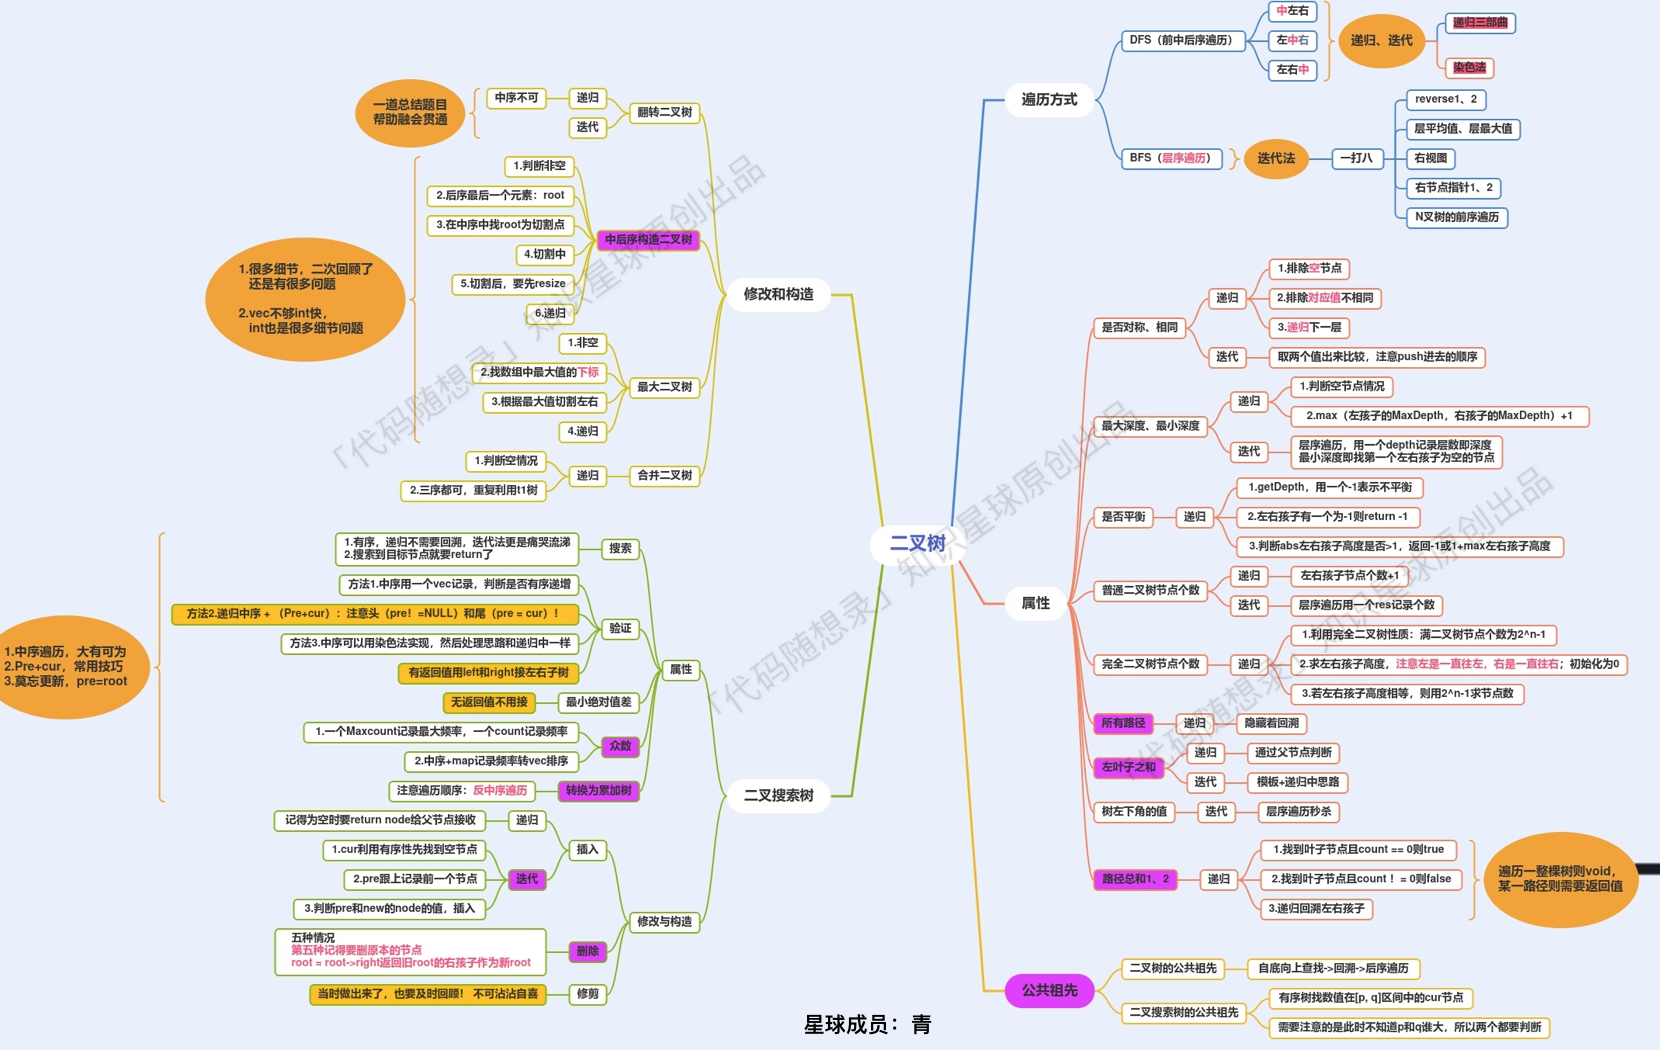